# Measuring k-mer detection against genome sequencing

Questions:
* how many reads do you need to detect a genome at what fraction?
* equiv., what is the minimum coverage needed?
* how well do FracMinHash hashes track actual number of k-mers?

Notebook run on 50kb genome with **100bp** reads.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('basic-detection-100bp.csv')
df

,num_reads,coverage,n_detected,f_detected,smash_count_0,smash_count_1,smash_count_2,smash_count_3,smash_count_4
0,0,0.000,0,0.0000,0,0,0,0,0
1,1,0.002,59,0.0012,0,0,1,0,1
2,2,0.004,98,0.0020,0,0,1,0,1
3,3,0.006,168,0.0034,0,0,1,0,1
4,4,0.008,238,0.0048,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1976,1976,3.952,44911,0.8988,36,39,44,49,65
1977,1977,3.954,44934,0.8992,36,39,44,49,65
1978,1978,3.956,44941,0.8994,36,39,44,49,65
1979,1979,3.958,44941,0.8994,36,39,44,49,65


## K-mer detection scales with number of reads

Notes:
* Only "correct" k-mers are counted.
* FracMinHash hashes are multiplied by scaled value (=1000)

(-100.0, 2000.0)

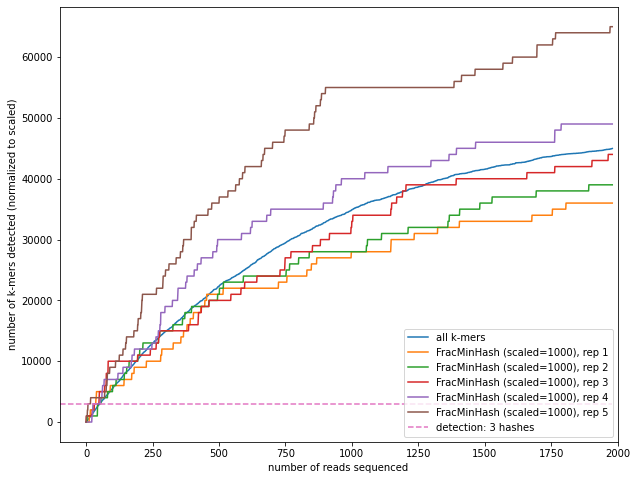

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df.num_reads, df.n_detected, label="all k-mers")
ax.plot(df.num_reads, df.smash_count_0 * 1000, label="FracMinHash (scaled=1000), rep 1")
ax.plot(df.num_reads, df.smash_count_1 * 1000, label="FracMinHash (scaled=1000), rep 2")
ax.plot(df.num_reads, df.smash_count_2 * 1000, label="FracMinHash (scaled=1000), rep 3")
ax.plot(df.num_reads, df.smash_count_3 * 1000, label="FracMinHash (scaled=1000), rep 4")
ax.plot(df.num_reads, df.smash_count_4 * 1000, label="FracMinHash (scaled=1000), rep 5")

ax.plot([-100, max(df.num_reads)], [3000, 3000], '--', label="detection: 3 hashes")

ax.set_xlabel("number of reads sequenced")
ax.set_ylabel("number of k-mers detected (normalized to scaled)")
ax.legend(loc='lower right')

#ax.set_ylim(0, 10*1000)
ax.set_xlim(-100, 2000)

## Low detection thresholds are reached quickly

A threshold of 3 hashes is reached with very few reads

Notes:
* Only "correct" k-mers are counted.
* FracMinHash hashes are multiplied by scaled value (=1000)

(-100.0, 1000.0)

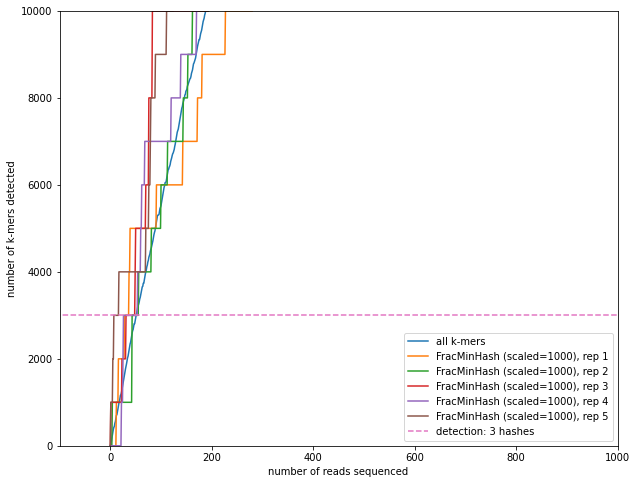

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df.num_reads, df.n_detected, label="all k-mers")
ax.plot(df.num_reads, df.smash_count_0 * 1000, label="FracMinHash (scaled=1000), rep 1")
ax.plot(df.num_reads, df.smash_count_1 * 1000, label="FracMinHash (scaled=1000), rep 2")
ax.plot(df.num_reads, df.smash_count_2 * 1000, label="FracMinHash (scaled=1000), rep 3")
ax.plot(df.num_reads, df.smash_count_3 * 1000, label="FracMinHash (scaled=1000), rep 4")
ax.plot(df.num_reads, df.smash_count_4 * 1000, label="FracMinHash (scaled=1000), rep 5")

ax.plot([-250, max(df.num_reads)], [3000, 3000], '--', label="detection: 3 hashes")

ax.set_xlabel("number of reads sequenced")
ax.set_ylabel("number of k-mers detected")
ax.legend(loc='lower right')

ax.set_ylim(0, 10*1000)
ax.set_xlim(-100, 1000)

## Detection threshold are quickly exceeded at low coverage

Notes:
* "coverage" depends on genome size, unlike number of reads sequenced (previous plots)
* Only "correct" k-mers are counted.
* FracMinHash hashes are multiplied by scaled value (=1000)

(-0.1, 2.0)

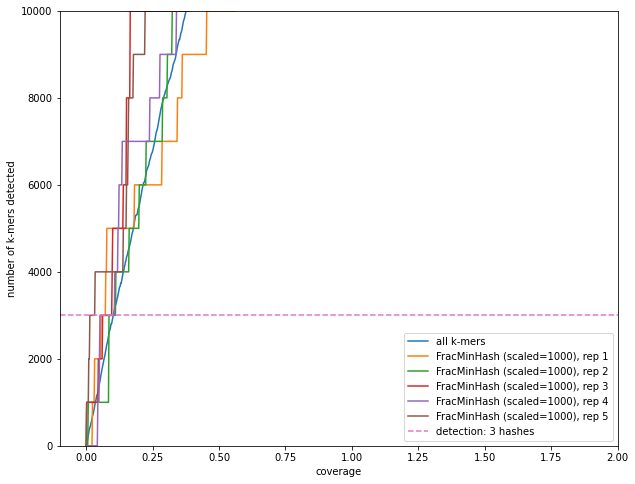

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df.coverage, df.n_detected, label="all k-mers")
ax.plot(df.coverage, df.smash_count_0 * 1000, label="FracMinHash (scaled=1000), rep 1")
ax.plot(df.coverage, df.smash_count_1 * 1000, label="FracMinHash (scaled=1000), rep 2")
ax.plot(df.coverage, df.smash_count_2 * 1000, label="FracMinHash (scaled=1000), rep 3")
ax.plot(df.coverage, df.smash_count_3 * 1000, label="FracMinHash (scaled=1000), rep 4")
ax.plot(df.coverage, df.smash_count_4 * 1000, label="FracMinHash (scaled=1000), rep 5")

ax.plot([-0.1, max(df.coverage)], [3000, 3000], '--', label="detection: 3 hashes")

ax.set_xlabel("coverage")
ax.set_ylabel("number of k-mers detected")
ax.legend(loc='lower right')

ax.set_ylim(0, 10*1000)
ax.set_xlim(-0.1, 2.0)